In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,img_as_float,img_as_ubyte

In [2]:
from skimage.restoration import denoise_nl_means,estimate_sigma

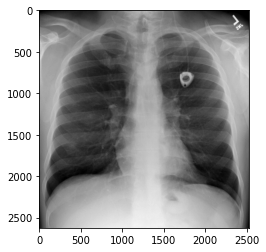

In [3]:
img=img_as_float(io.imread('test.jpg'))
plt.imshow(img,cmap="gray")

In [4]:
sigma_est=np.mean(estimate_sigma(img,channel_axis=None))

In [5]:
denoise_img=denoise_nl_means(img,h=1.15*sigma_est,fast_mode=True,patch_size=5,patch_distance=6,channel_axis=None)

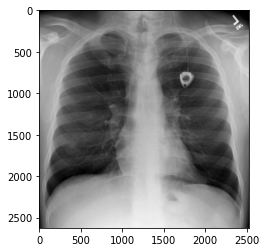

In [6]:
denoise_img=img_as_ubyte(denoise_img)
plt.imshow(denoise_img,cmap="gray")

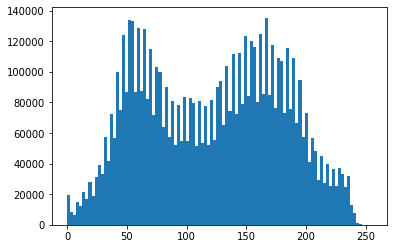

In [7]:
plt.hist(denoise_img.flat,bins=100,range=(0,255))
plt.show()

In [8]:
from skimage import exposure

In [9]:
eq_img=exposure.equalize_adapthist(denoise_img)

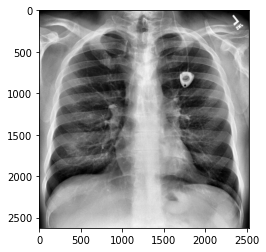

In [10]:
plt.imshow(eq_img,cmap="gray")

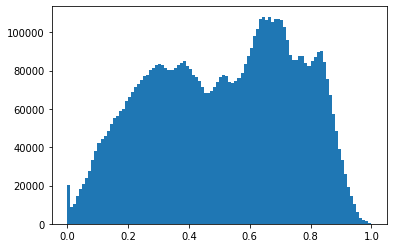

In [11]:
plt.hist(eq_img.flat,bins=100,range=(0,1))
plt.show()

In [12]:
markers=np.zeros(img.shape,dtype=np.uint)
eq_img


array([[0.00869246, 0.00869246, 0.00869246, ..., 0.00942703, 0.00942703,
        0.00942703],
       [0.00869246, 0.00869246, 0.00869246, ..., 0.00942703, 0.00942703,
        0.00942703],
       [0.00869246, 0.00869246, 0.00869246, ..., 0.00942703, 0.00942703,
        0.00942703],
       ...,
       [0.00783546, 0.00783546, 0.01089618, ..., 0.00189765, 0.00097943,
        0.00104065],
       [0.00783546, 0.00783546, 0.01089618, ..., 0.00189765, 0.00097943,
        0.00104065],
       [0.00783546, 0.00783546, 0.01089618, ..., 0.00189765, 0.00104065,
        0.00104065]])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint32)

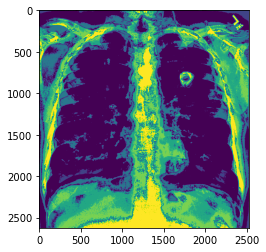

In [13]:
markers[(eq_img<0.05) & (eq_img>0)]=1
markers[(eq_img>0.45) & (eq_img<0.55)]=2
markers[(eq_img>0.6) & (eq_img<0.7)]=3
markers[(eq_img>0.7) & (eq_img<0.8)]=4
markers[(eq_img>0.82)]=5
plt.imshow(markers)
markers

In [14]:
from skimage.segmentation import random_walker

In [15]:
labels=random_walker(eq_img,markers,beta=10,mode="bf")

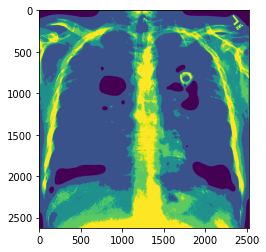

In [16]:
plt.imshow(labels)

In [17]:
np.unique(labels)

array([1, 2, 3, 4, 5], dtype=uint32)